# Linear Regression - California Houses Dataset


In [1]:
import sys
import os
sys.path.append('..')

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.preprocessing import preprocess_houses_data
from src.models.linear_regression import LinearRegression
from src.utils.visualization import plot_training_curves, plot_predictions, plot_feature_importance

plt.style.use('seaborn-v0_8')
torch.manual_seed(42)
np.random.seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device: {device}")

X_train, X_test, y_train, y_test, feature_names = preprocess_houses_data('../data/California_Houses.csv', device=device)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Features: {X_train.shape[1]}")
print(f"Train samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"y_train range: {y_train.min().item():.2f} - {y_train.max().item():.2f}")
print(f"y_train mean: {y_train.mean().item():.2f}")



Device: cuda
X_train shape: torch.Size([16512, 24])
X_test shape: torch.Size([4128, 24])
y_train shape: torch.Size([16512])
y_test shape: torch.Size([4128])
Features: 24
Train samples: 16512
Test samples: 4128
y_train range: 14999.00 - 500001.00
y_train mean: 206995.56


In [2]:
learning_rate = 0.1
max_epochs = 1000

model = LinearRegression(
    learning_rate=learning_rate,
    max_epochs=max_epochs,
    device=device
)

print(f"Learning rate: {learning_rate}")
print(f"Max epochs: {max_epochs}")

model.fit(X_train, y_train, X_test, y_test)
print(f"Epochs: {len(model.history['train_loss'])}")
print(f"Final train loss: {model.history['train_loss'][-1]:.4f}")
if model.history['val_metrics']:
    print(f"Final val R²: {model.history['val_metrics'][-1]['r2']:.4f}")
    print(f"Final val RMSE: {model.history['val_metrics'][-1]['rmse']:.4f}")

y_pred = model.predict(X_test)
test_metrics = model.score(X_test, y_test)

print(f"Test samples: {test_metrics['n']}")
print(f"Sum absolute errors: {test_metrics['sum_abs']:.4f}")
print(f"Sum squared errors: {test_metrics['sum_sq']:.4f}")
print(f"Test MSE: {test_metrics['mse']:.4f}")
print(f"Test MAE: {test_metrics['mae']:.4f}")
print(f"Test RMSE: {test_metrics['rmse']:.4f}")
print(f"Test R²: {test_metrics['r2']:.4f}")
if 'mape' in test_metrics:
    print(f"Test MAPE: {test_metrics['mape']:.4f}%")

baseline_pred = torch.full_like(y_test, y_train.mean())
baseline_mse = torch.mean((y_test - baseline_pred) ** 2).item()
baseline_mae = torch.mean(torch.abs(y_test - baseline_pred)).item()

print(f"Baseline MSE: {baseline_mse:.4f}")
print(f"Baseline MAE: {baseline_mae:.4f}")



Learning rate: 0.1
Max epochs: 1000
Epochs: 1000
Final train loss: 4190815744.0000
Final val R²: 0.6753
Final val RMSE: 65594.5625
Test samples: 4128
Sum absolute errors: 195714512.0000
Sum squared errors: 17761323450368.0000
Test MSE: 4302646272.0000
Test MAE: 47411.4609
Test RMSE: 65594.5625
Test R²: 0.6753
Test MAPE: 27.9270%
Baseline MSE: 13249899520.0000
Baseline MAE: 90553.1641


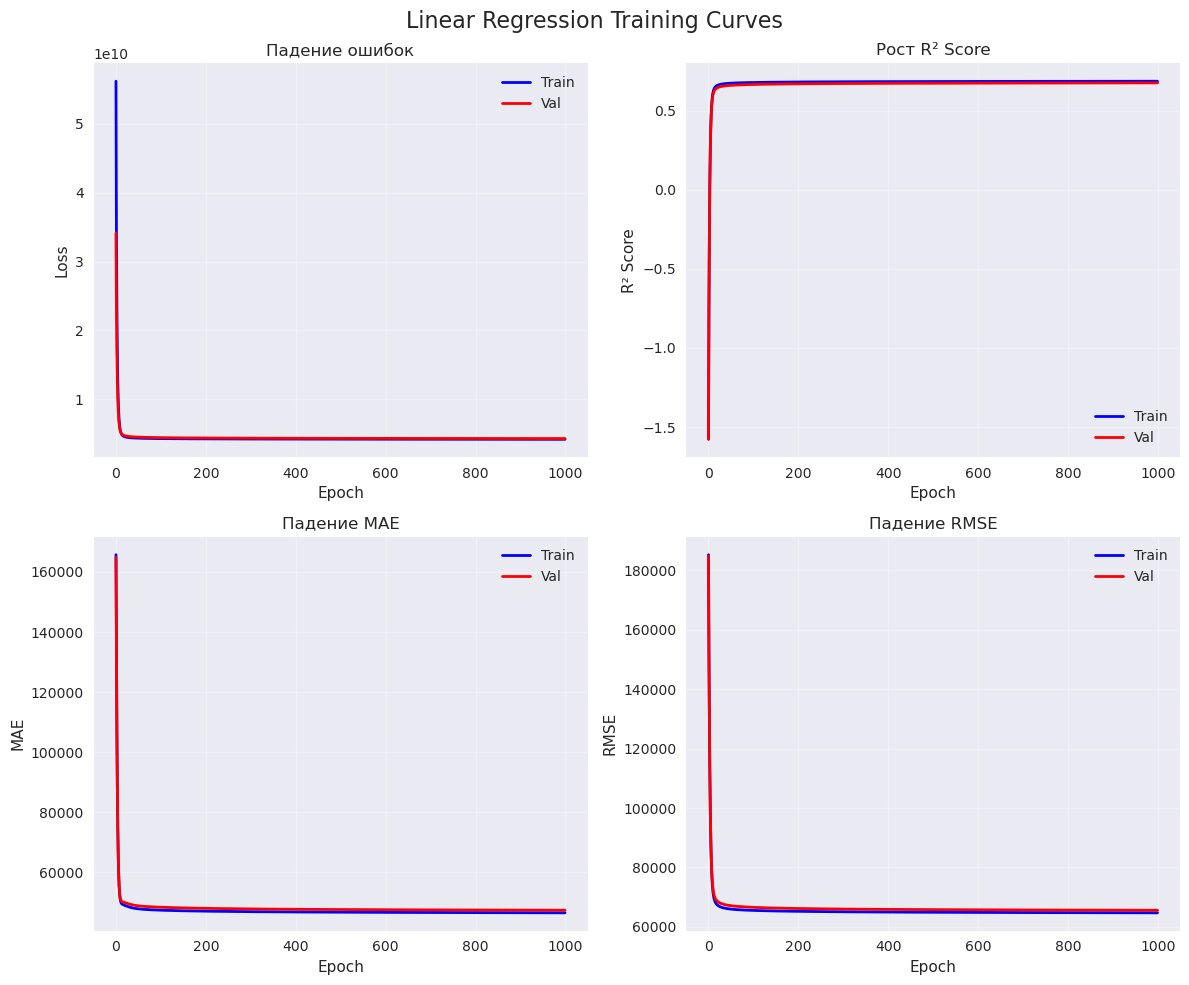

In [3]:
plot_training_curves(model.history, title="Linear Regression Training Curves", model_type="regression", max_epochs_display=1000)

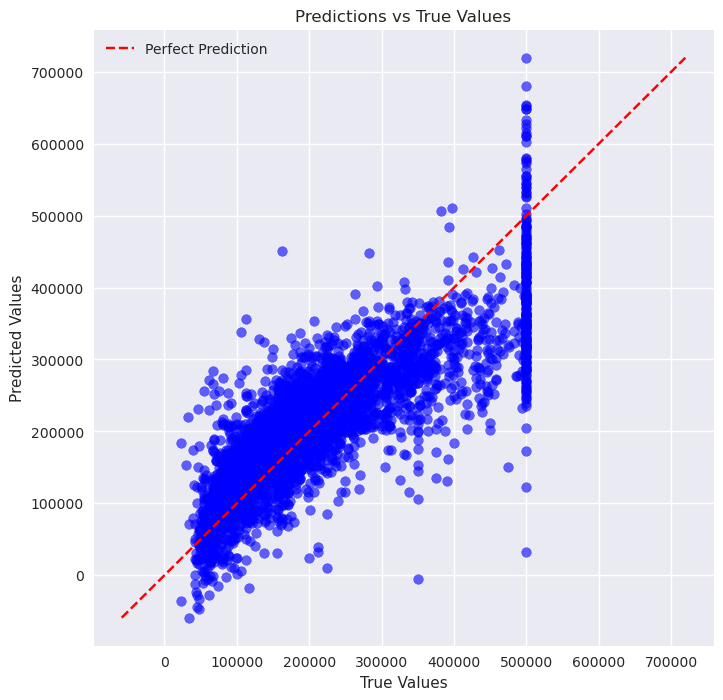

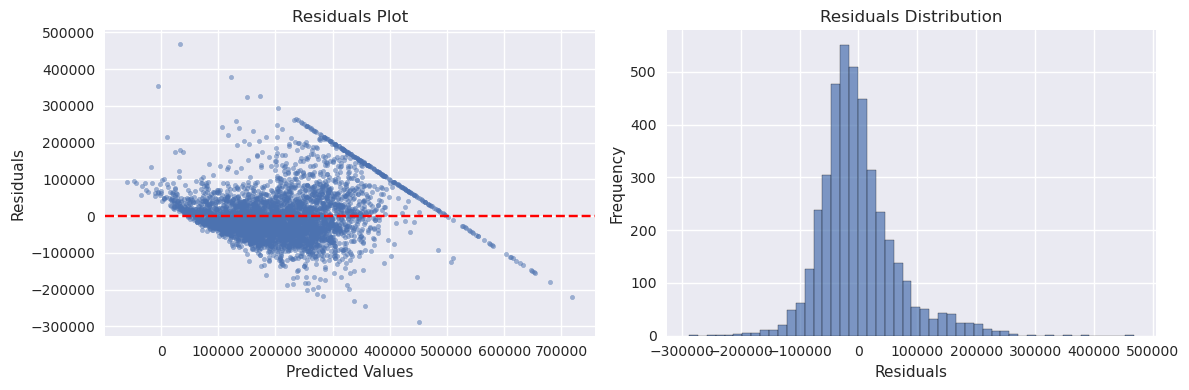

In [4]:
plot_predictions(y_test, y_pred, title="Predictions vs True Values")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
residuals = (y_test - y_pred).cpu().numpy()
plt.scatter(y_pred.cpu().numpy(), residuals, alpha=0.5, s=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.grid(True)

plt.tight_layout()
plt.show()


                           Feature        Weight    Abs_Weight
7                        Longitude -70539.156250  70539.156250
0                    Median_Income  64203.671875  64203.671875
9                   Distance_to_LA -50161.332031  50161.332031
10            Distance_to_SanDiego  42628.484375  42628.484375
6                         Latitude -40973.429688  40973.429688
20                     LuxuryIndex  36180.710938  36180.710938
13               RoomsPerHousehold -27243.275391  27243.275391
12        Distance_to_SanFrancisco  24041.595703  24041.595703
4                       Population -22888.503906  22888.503906
15                    Spaciousness  21319.537109  21319.537109
21  Latitude_Longitude_Interaction  20605.400391  20605.400391
16               MinDistanceToCity -18582.908203  18582.908203
11             Distance_to_SanJose -14823.446289  14823.446289
3                     Tot_Bedrooms  13466.209961  13466.209961
19                  RoomEfficiency  11966.029297  11966

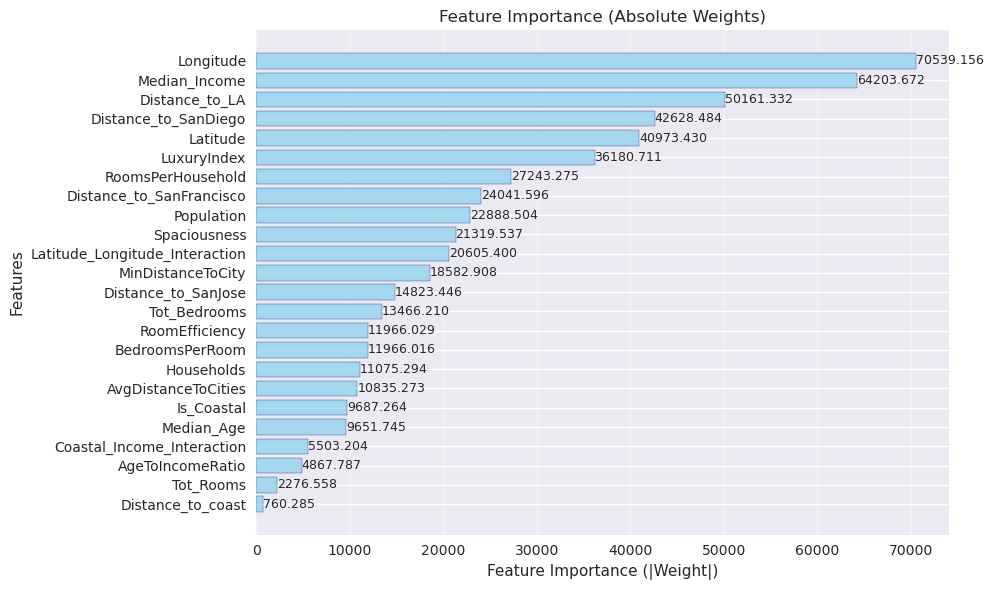


Соответствие признаков и весов:
  Distance_to_coast: 760.2849
  Tot_Rooms: 2276.5579
  AgeToIncomeRatio: -4867.7866
  Coastal_Income_Interaction: 5503.2036
  Median_Age: 9651.7451
  Is_Coastal: 9687.2637
  AvgDistanceToCities: 10835.2734
  Households: 11075.2939
  BedroomsPerRoom: 11966.0156
  RoomEfficiency: 11966.0293
  Tot_Bedrooms: 13466.2100
  Distance_to_SanJose: -14823.4463
  MinDistanceToCity: -18582.9082
  Latitude_Longitude_Interaction: 20605.4004
  Spaciousness: 21319.5371
  Population: -22888.5039
  Distance_to_SanFrancisco: 24041.5957
  RoomsPerHousehold: -27243.2754
  LuxuryIndex: 36180.7109
  Latitude: -40973.4297
  Distance_to_SanDiego: 42628.4844
  Distance_to_LA: -50161.3320
  Median_Income: 64203.6719
  Longitude: -70539.1562


In [5]:
weights = model.weights.detach().cpu().numpy()

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Weight': weights,
    'Abs_Weight': np.abs(weights)
}).sort_values('Abs_Weight', ascending=False)

print(feature_importance)

plot_feature_importance(weights, feature_names, title="Feature Importance (Absolute Weights)")
